Dieses Programm sagt die Aktienkurse von Facebook voraus

In [1]:
# Installieren der Quandl_Erweiterung
!pip install quandl

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Importieren der Pakete und Modelle 
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [4]:
# Importieren der Aktienkurse aus Quandl (hier FB(Facebook))
df = quandl.get("WIKI/FB")
# Anzeigen des Datensatzes
print(df.head())

             Open   High    Low    Close       Volume  Ex-Dividend  \
Date                                                                 
2012-05-18  42.05  45.00  38.00  38.2318  573576400.0          0.0   
2012-05-21  36.53  36.66  33.00  34.0300  168192700.0          0.0   
2012-05-22  32.61  33.59  30.94  31.0000  101786600.0          0.0   
2012-05-23  31.37  32.50  31.36  32.0000   73600000.0          0.0   
2012-05-24  32.95  33.21  31.77  33.0300   50237200.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2012-05-18          1.0      42.05      45.00     38.00     38.2318   
2012-05-21          1.0      36.53      36.66     33.00     34.0300   
2012-05-22          1.0      32.61      33.59     30.94     31.0000   
2012-05-23          1.0      31.37      32.50     31.36     32.0000   
2012-05-24          1.0      32.95      33.21     31.77     33.0300   

           

In [5]:
# Benötigt wird nur der Adj.Close-Preis, sodass ein neues Dataframe erstellt wird, welches nur 'Adj.Close' beinhaltet
df = df[['Adj. Close']]
# Anzeigen des aktualisierten Dataframes
print(df.head())

            Adj. Close
Date                  
2012-05-18     38.2318
2012-05-21     34.0300
2012-05-22     31.0000
2012-05-23     32.0000
2012-05-24     33.0300


In [6]:
# Erstellen einer Variable für die Vorhersagen [forecast_out], dessen n-Wert (vorausgesagte Tage(hier: 10)) sich beliebig anpassen lässt.
forecast_out = 10
# Erstellen einer weiteren Spalte neben 'Adj.Close' names 'Prediction', welche die Zielvariable darstellt.
# Hierfür wird 'Adj.Close' dupliziert und um das n von forecast_out hochgerückt.
# So entsteht eine Lücke zwischen den letzten 'n' von 'Adj.Close' denen bisher kein Wert gegenübersteht.
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
# Visualieren des neuen Datensatzes mit den Spalten 'Adj. Close' und 'Prediction'
print(df.tail(15))

# Das Vorgehen wird deutlich, wenn die letzten 15 Zeilen des Datensatzes ausgegeben werden sollen, während das n=10 beträgt.
# Die 'Adj.Close'-Werte wurde, um den Wert 'n' nach oben gerückt, sodass eine wertlose Lücke entsteht, die später vorhergesagt werden soll.


            Adj. Close  Prediction
Date                              
2018-03-07      183.71      169.39
2018-03-08      182.34      164.89
2018-03-09      185.23      159.39
2018-03-12      184.76      160.06
2018-03-13      181.88      152.19
2018-03-14      184.19         NaN
2018-03-15      183.86         NaN
2018-03-16      185.09         NaN
2018-03-19      172.56         NaN
2018-03-20      168.15         NaN
2018-03-21      169.39         NaN
2018-03-22      164.89         NaN
2018-03-23      159.39         NaN
2018-03-26      160.06         NaN
2018-03-27      152.19         NaN


In [7]:
# Erstellen des unabhängigen Datensatzes (x) mit der Spalte 'Adj.Close'
# Konvertieren des Dataframe zu einem Numpy Array und entfernen der 'Prediction'-Spalte
X = np.array(df.drop(['Prediction'], 1))
# Entfernen der letzten n Zeilen
X = X[:-forecast_out]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [185.23  ]
 [184.76  ]
 [181.88  ]]


In [8]:
# Erstellen des Zieldatensatzes (y) mit der Spalte 'Prediction'
# Konvertieren des Datenframe zu einem Numpy Array (alle Daten inklusive NaN)
y = np.array(df['Prediction'])
# Einbeziehen aller Werte bis auf n bzw. forecast_out
y = y[:-forecast_out]
print(y)

[ 26.9    25.869  26.81  ... 159.39  160.06  152.19 ]


In [9]:
# Aufteilen der x & y  Datensätze in Trainings- und Testdatensätze
# Verhältnis 80/20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [10]:
# Erstellen des SVM-Modells (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Trainieren des SVM-Modells (Regressor)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# Evaluation der Genauigkeit, angegeben als Koeffizient des R2 der Vorhersage.
# Bestmöglicher Wert = 1.0

# Erstellen der Variable svm_confidence
svm_confidence = svr_rbf.score(x_test, y_test)
# Anzeigen der Genauigkeit R2 der Support Vector Machine:
print('svm_confidence: ', svm_confidence)


svm_confidence:  0.9916307276100916


In [12]:
# Erstellen der Linearen Regression
lr = LinearRegression()
# Trainieren der Linearen Regression
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Evaluation der Genauigkeit, angegeben als Koeffizient des R2 der Vorhersage.
# Bestmöglicher Wert = 1.0

# Erstellen der Variable lr_confidence
lr_confidence = lr.score(x_test, y_test)

# Anzeigen der Genauigkeit R2 der Linearen Regression:
print('lr_confidence: ', lr_confidence)

lr_confidence:  0.9910932687724556


In [14]:
# Erstellen der Variable x_forecast
# Enthält ausschließlich die letzten n Zeilen von Adj. Close des ursprünglichen Dataframes
# (denen kein Wert, sondern lediglich NaN gegenübersteht)

x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
print(x_forecast)

[[184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


In [15]:
# Vorhersage der Linearen Regression für die nächsten n Tage
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Vorhersage des Support Vector Machines für die nächsten n Tage

svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[185.08592156 184.75611041 185.9854065  173.46257727 169.05510106
 170.29439142 165.79696672 160.3001143  160.96973087 153.10423478]
[179.10121832 178.79170922 178.35281985 169.94897126 170.35816883
 170.24829693 170.15864446 168.91022394 172.80305389 150.12171718]


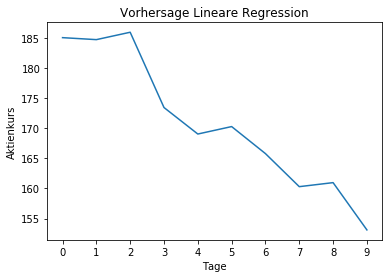

In [50]:
# Anzeigen der prognostizierten Kurse für die nächsten 'n'-Tage
# Vorhersage auf Grundlage der Linearen Regression

import matplotlib.pyplot as plt
import numpy as np

x = np.array(lr_prediction)
y = np.array(svm_prediction)

plt.plot(x)
plt.title('Vorhersage Lineare Regression')
plt.ylabel('Aktienkurs')
plt.xlabel('Tage')
plt.xticks(np.arange(forecast_out),)
plt.show()

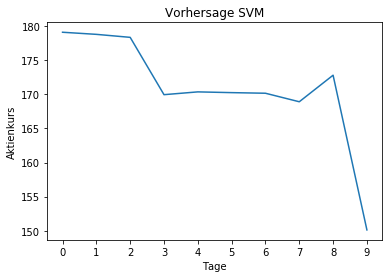

In [51]:
# Anzeigen der prognostizierten Kurse für die nächsten 'n'-Tage
# Vorhersage auf Grundlage des Support Vector Machines

import matplotlib.pyplot as plt
import numpy as np

x = np.array(svm_prediction)

plt.plot(x)
plt.title('Vorhersage SVM')
plt.ylabel('Aktienkurs')
plt.xlabel('Tage')
plt.xticks(np.arange(forecast_out),)
plt.show()